### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Whickham.txt')

In [3]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


Original Data:
  outcome smoker  age
0   Alive    Yes   23
1   Alive    Yes   18
2    Dead    Yes   71
3   Alive     No   67
4   Alive     No   64

Data Types:
outcome    object
smoker     object
age         int64
dtype: object

Encoded Data Columns:
Index(['age', 'smoker_Yes', 'outcome_Dead'], dtype='object')

Encoded Data:
   smoker_Yes  age
0        True   23
1        True   18
2        True   71
3       False   67
4       False   64
0    False
1    False
2     True
3    False
4    False
Name: outcome_Dead, dtype: bool


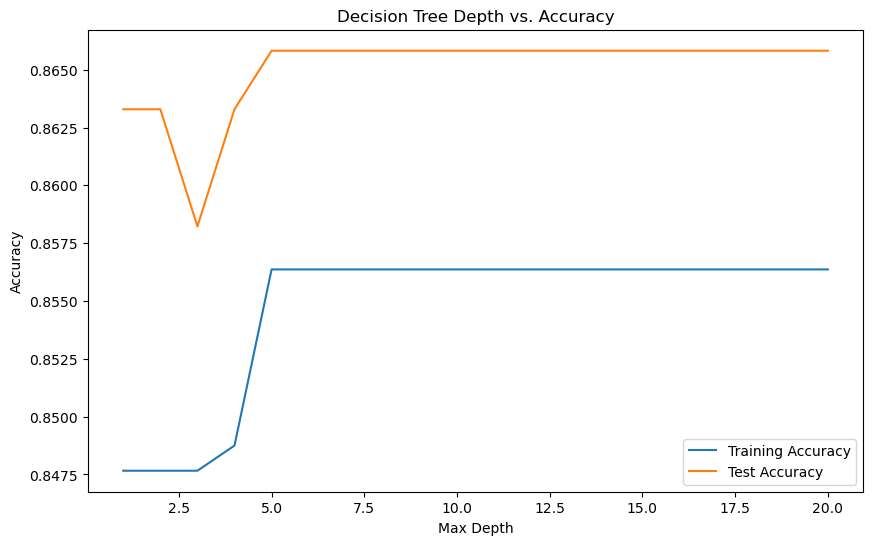

In [9]:
# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Display the data types of each column
print("\nData Types:")
print(data.dtypes)

# Perform one-hot encoding for 'smoker' and 'outcome'
data_encoded = pd.get_dummies(data, columns=['smoker', 'outcome'], drop_first=True)

# Display the columns to identify the target variable column name
print("\nEncoded Data Columns:")
print(data_encoded.columns)

# Define features (X) and target (y)
# Check for correct outcome column
if 'outcome_Alive' in data_encoded.columns:
    target_column = 'outcome_Alive'
else:
    target_column = 'outcome_Dead'

# Define features (X) and target (y)
X = data_encoded[['smoker_Yes', 'age']]
y = data_encoded[target_column]

# Display the first few rows of the encoded dataset
print("\nEncoded Data:")
print(X.head())
print(y.head())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree models with varying max_depth
max_depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.legend()
plt.show()
